In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

digits = load_digits()



In [22]:
# input variable ya feature(x)
digits.data.shape           # Output : (1797, 64) : it shows > 1797 are No. of pictures and (64, 8x8 is size)
x = digits.data


In [20]:
# Output Labels (y)
digits.target.shape         # Output shows there are only labels, (1797,)
y = digits.target

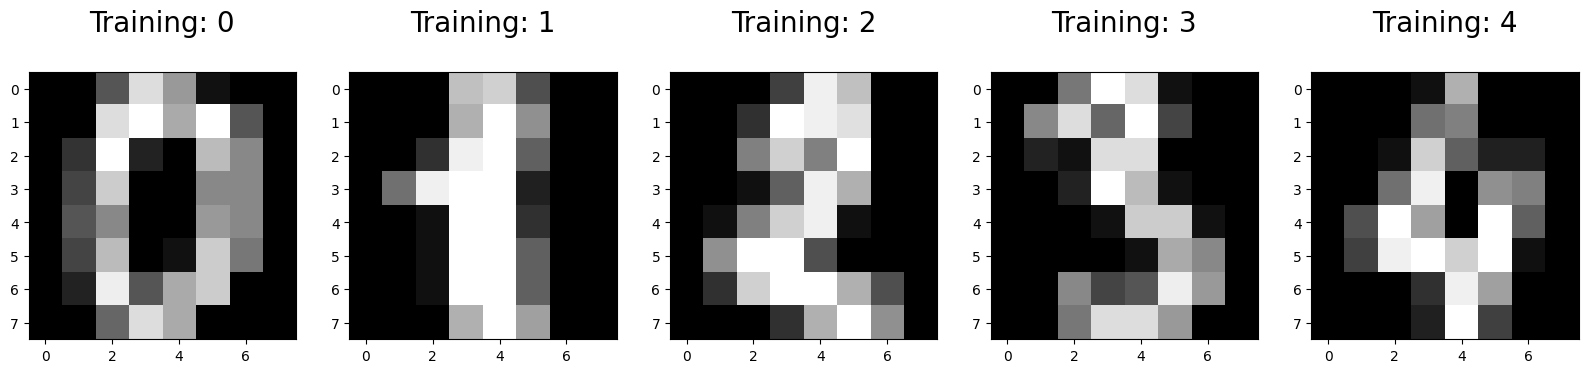

In [11]:
plt.figure(figsize = (20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

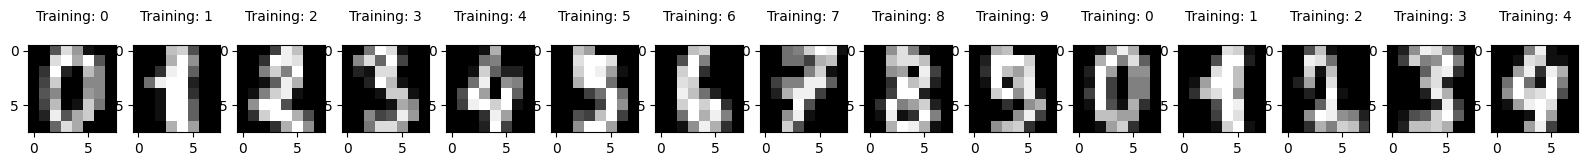

In [13]:
plt.figure(figsize = (20,4))
for index, (image,label) in enumerate(zip(digits.data[0:15], digits.target[0:15])):
    plt.subplot(1,15, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 10)

In [24]:
# help(plt)

In [25]:
# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)



In [27]:
print("Train input data : ", x_train.shape)
print("Test input data : ", x_test.shape)
print("Train output data : ", y_train.shape)
print("Test output data : ", x_test.shape) 

Train input data :  (1437, 64)
Test input data :  (360, 64)
Train output data :  (1437,)
Test output data :  (360, 64)


In [29]:
# Model Train
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(x_train,y_train)
log_reg

c:\Users\Hunain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
predictions = log_reg.predict(x_test[0:10])
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [34]:
# accuracy test
score = log_reg.score(x_test,y_test)
print("The Accuracy of Test : ", score*100)

The Accuracy of Test :  96.66666666666667


In [42]:
# Confusion Matrix
from sklearn import metrics
predictions = log_reg.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm


array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score : 96.66666666666667')

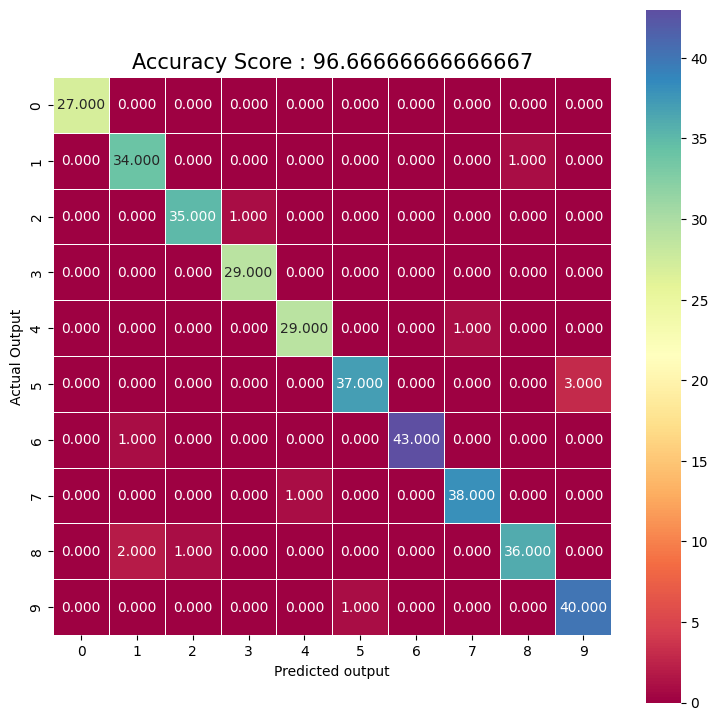

In [48]:
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths = .5, square = True, cmap = "Spectral")
plt.ylabel("Actual Output")
plt.xlabel("Predicted output")
all_sample_title = "Accuracy Score : {0}".format(score*100)
plt.title(all_sample_title, size=15)

In [50]:
# Getting miss classified labels :

index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test,predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
        index += 1 


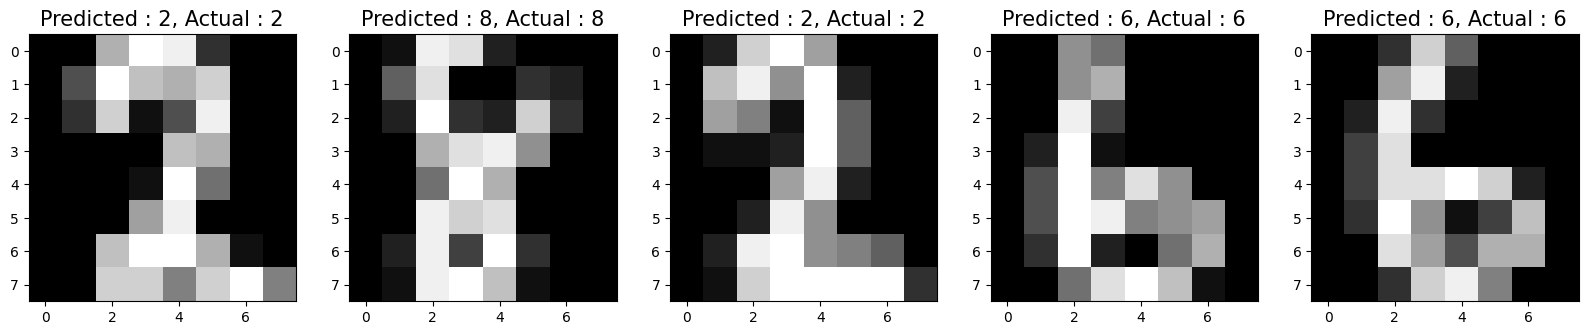

In [52]:
# plotting misclassified labels with known labels

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1,5,plotIndex+1)
    plt.imshow(np.reshape(x_test[badIndex],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted : {}, Actual : {}".format(predictions[badIndex],y_test[badIndex]),fontsize = 15)


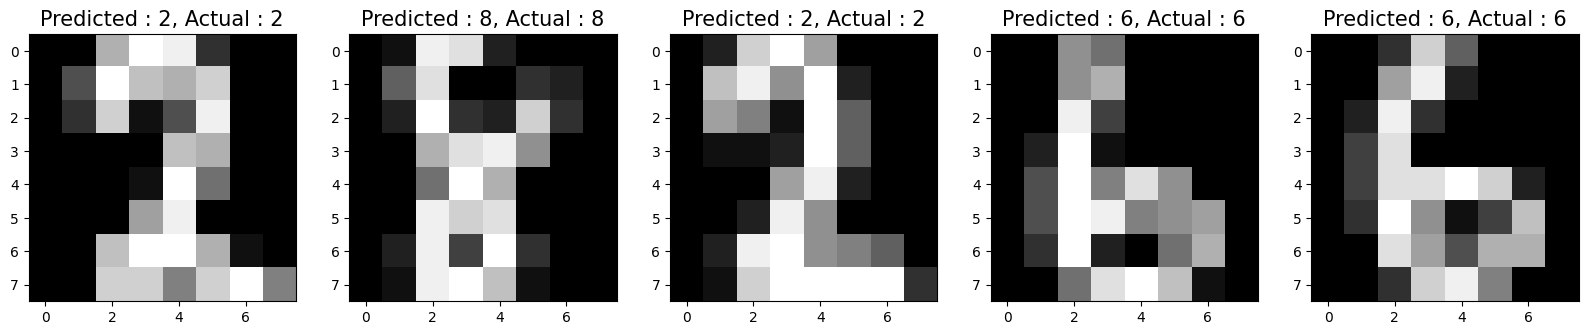

In [54]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1,5,plotIndex+1)
    plt.imshow(np.reshape(x_test[badIndex],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted : {}, Actual : {}".format(predictions[badIndex],y_test[badIndex]),fontsize = 15)